In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# read json file with pandas

file_name = "/net/scratch2/listar2000/gfn-od/src/diffuse/outputs/gen.json"
df = pd.read_json(file_name)

# rename the columns
df.columns = ["rng_0", "rng_1"]

df.head()

,rng_0,rng_1
0,{6},{44}
1,{3},{100}
2,{7},{91}
3,{6},{26}
4,{5},{34}


In [9]:
# map each entry of the df from a "{number}" to the number itself in int
rng_0 = df["rng_0"].map(lambda x: x.replace("{", "").replace("}", "").strip()).astype(int)
rng_1 = df["rng_1"].map(lambda x: x.replace("{", "").replace("}", "").strip()).astype(int)

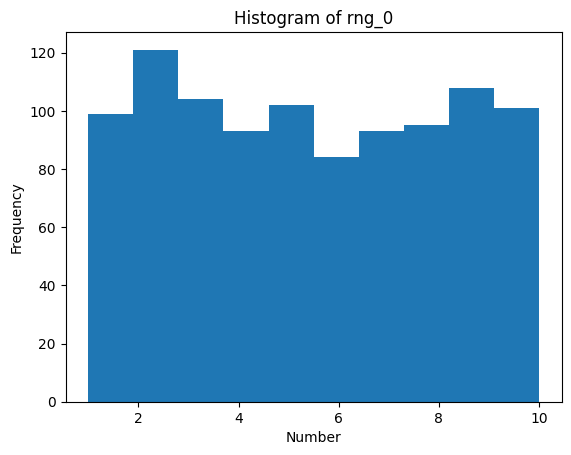

In [10]:
# plot the histogram of rng_0 (should be between 1 and 10)
plt.hist(rng_0, bins=10)
plt.title("Histogram of rng_0")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

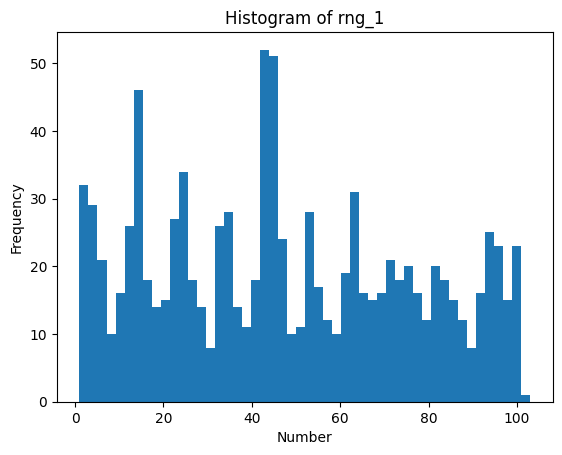

In [13]:
# plot the histogram of rng_1 (should be between 1 and 100)
plt.hist(rng_1, bins=50)
plt.title("Histogram of rng_1")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

In [15]:
file_name = "/net/scratch2/listar2000/gfn-od/src/diffuse/outputs_2/gen.json"
df2 = pd.read_json(file_name)

df2.columns = ["rng_2"]

In [23]:
rng_2 = df2['rng_2'].str.extract(r'(\d+)')
# remove NaN and convert to int
rng_2 = rng_2.dropna().astype(int)

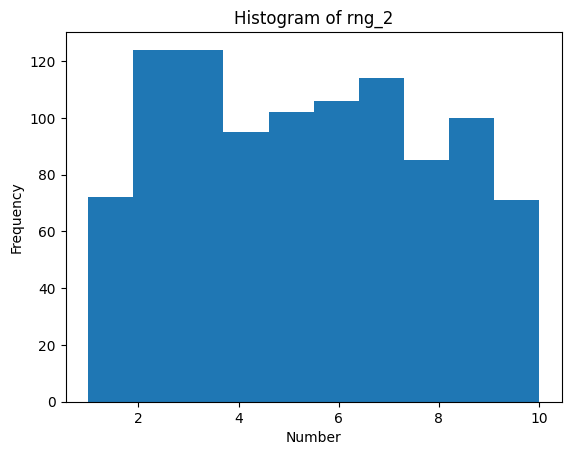

In [25]:
plt.hist(rng_2, bins=10)
plt.title("Histogram of rng_2")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

In [30]:
# calculate the entropy of numbers within 1 - 10
def calculate_empirical_entropy(rng):
    fracs = np.bincount(rng, minlength=10) / len(rng)
    fracs = fracs[1:]
    return -np.sum(fracs * np.log2(fracs))

calculate_empirical_entropy(rng_0)

3.315480716833678

In [40]:
# rng2 to a python list
calculate_empirical_entropy(rng_2[0])

3.2975191153986523

In [41]:
file_name = "/net/scratch2/listar2000/gfn-od/src/diffuse/outputs_3/gen.json"
df3 = pd.read_json(file_name)

df3.columns = ["rng_3"]

df3.head()

,rng_3
0,{1} {10}
1,{6} {8}
2,{7} {7}
3,{10} {3}
4,{8} {2}


In [50]:
df3[["num1", "num2"]] = df3['rng_3'].str.extract(r'\{(\d+)\} \{(\d+)\}').dropna().astype(int)

df3

,rng_3,num1,num2
0,{1} {10},1.0,10.0
1,{6} {8},6.0,8.0
2,{7} {7},7.0,7.0
3,{10} {3},10.0,3.0
4,{8} {2},8.0,2.0
...,...,...,...
995,{2} {1},2.0,1.0
996,{1} {8},1.0,8.0
997,{4} {6},4.0,6.0
998,{6} {3},6.0,3.0


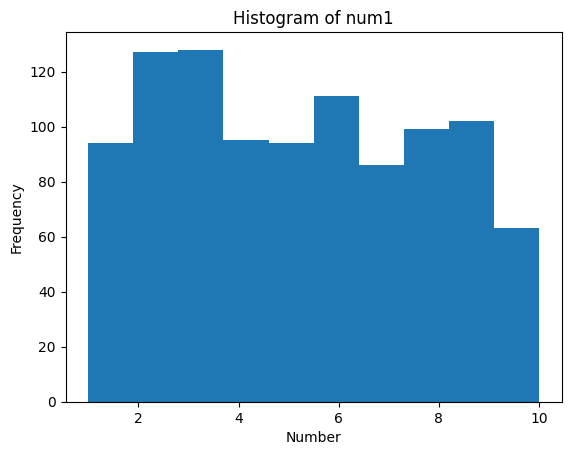

In [52]:
num1 = df3['num1']
num2 = df3['num2']

# plot the histogram of num1
plt.hist(num1, bins=10)
plt.title("Histogram of num1")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

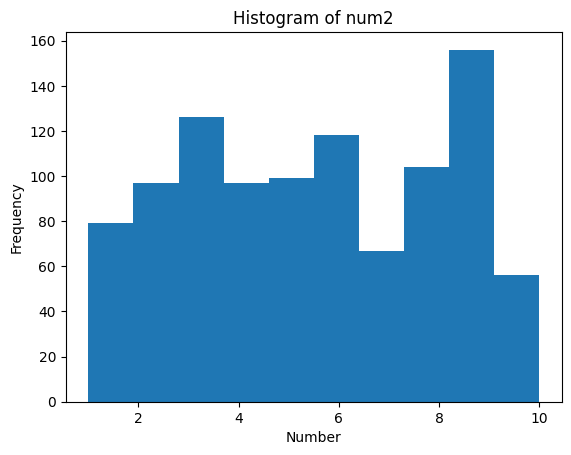

In [53]:
# plot the histogram of num2
plt.hist(num2, bins=10)
plt.title("Histogram of num2")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

In [58]:
df3['num1'].min(), df3['num1'].max(), df3['num2'].min(), df3['num2'].max()

(1.0, 10.0, 1.0, 10.0)

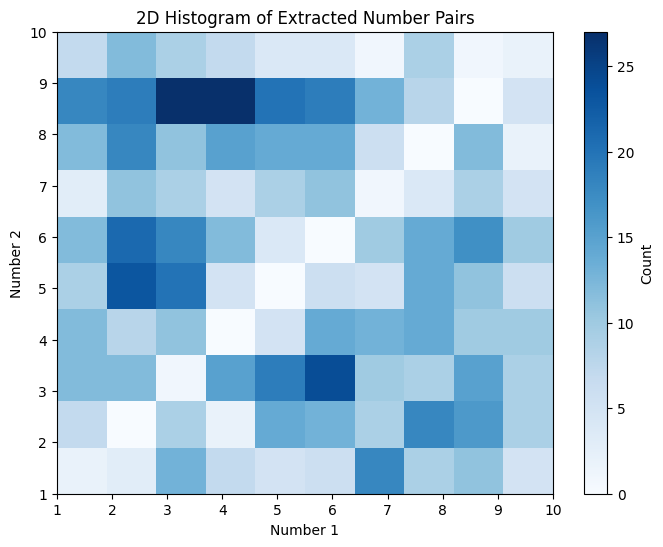

In [63]:
# Create the 2D histogram
plt.figure(figsize=(8, 6))
plt.hist2d(df3['num1'].dropna(), df3['num2'].dropna(), bins=10, cmap='Blues')

# Add colorbar and labels
plt.colorbar(label='Count')
plt.xlabel('Number 1')
plt.ylabel('Number 2')
plt.title('2D Histogram of Extracted Number Pairs')

# Show the plot
plt.show()